In [1]:
from google.colab import drive 

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
!ls "/content/drive/MyDrive/AIAssignment2/imdb"

test.json  train.json  valid.json


In [38]:
import nltk
import spacy
import pandas as pd

nltk.download('stopwords') 
path_dir = '/content/drive/MyDrive/AIAssignment2/imdb'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
df_reviews_train = pd.read_json(path_dir + "/train.json")

In [40]:
print(df_reviews_train.head())
print(df_reviews_train.iloc[0]['text'])

                                                text  label  \
0  Robin Williams does his best to combine comedy...      1   
1  I have to hand it to the creative team behind ...      1   
2  Webs starts in 'Chicago: Present Day' as four ...      0   
3  If you like horror movies with lots of blood a...      1   
4  I saw this film under the title of "Tied Up". ...      0   

                                                ents  \
0  [[Robin Williams, 0, 14, 0.5], [Donald Moffat,...   
1  [[American Pie, 53, 72, 0.477818846702575], [A...   
2  [[Richard Grieco, 66, 80, 0.5], [Richard Yearw...   
3  [[horror, 12, 23, 0.35198992490768405], [jump-...   
4                       [[the price, 445, 462, 0.5]]   

                                                 ann  
0  [[Q83338, 0, 14, 0.5], [Q1240192, 87, 100, 0.5...  
1  [[Q220713, 53, 65, 0.477818846702575], [Q22071...  
2  [[Q960809, 66, 80, 0.5], [Q3431337, 88, 104, 0...  
3  [[Q200092, 12, 18, 0.35198992490768405], [Q186...  
4        

In [41]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
def text_preprocessing(text):
    # tokenization, remove punctuation, and lemmatization
    words_lemma=[token.lemma_ for token in nlp(text) if not token.is_punct]
    # remove symbols, websites, email addresses
    words_clean = clean_text(words_lemma)
    # remove stopwords
    words_sp = [word.lower() for word in words_clean if word.lower() not in stopwords_lower]
    # combine token list into string  
    s_text = " ".join(words_sp)
    return s_text

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# import first 10 reviews
texts = df_reviews_train['text'].to_list()
texts = texts[:10]

# initialize function and generate term-frequency-document matrix
vectorizer = CountVectorizer()
vectorizer.fit(texts)
vector = vectorizer.transform(texts)

print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
#print out vocabulary
print(vectorizer.vocabulary_)
#print doc-word matrix
print(vector.toarray())

Vocabulary size: 1083
{'robin': 764, 'williams': 1054, 'does': 220, 'his': 419, 'best': 77, 'to': 961, 'combine': 152, 'comedy': 154, 'and': 29, 'pathos': 661, 'but': 115, 'comes': 155, 'off': 619, 'bit': 85, 'shrill': 826, 'donald': 225, 'moffat': 572, 'is': 469, 'too': 965, 'one': 629, 'note': 610, 'as': 44, 'father': 308, 'in': 453, 'law': 502, 'jeff': 476, 'bridges': 103, 'excellent': 286, 'though': 949, 'the': 931, 'quarterback': 715, 'holly': 425, 'palance': 650, 'pamela': 651, 'reed': 737, 'are': 40, 'marvelous': 543, 'carrying': 125, 'film': 321, 'through': 954, 'most': 579, 'of': 618, 'its': 471, 'rough': 772, 'spots': 864, 'it': 470, 'fills': 320, 'time': 957, 'nicely': 603, 'little': 516, 'more': 577, 'than': 929, 'that': 930, 'have': 401, 'hand': 395, 'creative': 175, 'team': 919, 'behind': 71, 'these': 938, 'american': 27, 'pie': 670, 'movies': 585, 'direct': 212, 'dvd': 241, 'typically': 983, 'synonymous': 908, 'with': 1058, 'cheap': 137, 'incompetent': 459, 'making': 539

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf = TfidfVectorizer(stop_words='english')
vectorizer_tf.fit(texts)
vector_tf = vectorizer_tf.transform(texts)

print("Vocabulary size: {}".format(len(vectorizer_tf.vocabulary_)))
#print out vocabulary
print(vectorizer_tf.vocabulary_)
#print TF-IDF matrix
print(vector_tf.toarray())

Vocabulary size: 48767
{'robin': 36667, 'williams': 47687, 'does': 12760, 'best': 4500, 'combine': 8760, 'comedy': 8779, 'pathos': 31753, 'comes': 8786, 'bit': 4778, 'shrill': 39123, 'donald': 12858, 'moffat': 28367, 'note': 29997, 'father': 15720, 'law': 24884, 'jeff': 23153, 'bridges': 5829, 'excellent': 15008, 'quarterback': 34509, 'holly': 20569, 'palance': 31352, 'pamela': 31393, 'reed': 35389, 'marvelous': 26891, 'carrying': 6976, 'film': 16109, 'rough': 36935, 'spots': 40794, 'fills': 16108, 'time': 43714, 'nicely': 29676, 'little': 25554, 'hand': 19475, 'creative': 10104, 'team': 42999, 'american': 1905, 'pie': 32523, 'movies': 28822, 'direct': 12193, 'dvd': 13546, 'typically': 44966, 'synonymous': 42610, 'cheap': 7618, 'incompetent': 21796, 'making': 26438, 'year': 48368, 'pleasantly': 32854, 'surprised': 42284, 'thoroughly': 43520, 'enjoying': 14400, 'sequel': 38445, 'naked': 29229, 'mile': 27897, 'filmmakers': 16127, 'took': 43980, 'advantage': 1172, 'opportunity': 30678, 'd

In [86]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize

texts = df_reviews_train['text'].to_list()
# tokenize texts before feeding into the model training
data = []
# iterate through each sentence in the file
for t in texts:
    temp = []
    for i in sent_tokenize(t):
        # tokenize the sentence into words
        for j in word_tokenize(i):
            temp.append(j.lower())
    data.append(temp)

# CBOW
model = Word2Vec(data, window=5, min_count=1, workers=4)
model.save("word2vec.model")
model

# Skip-gram
model_sg = Word2Vec(data, window=5, min_count=1, workers=4, sg=1)
model_sg.save("word2vec_sg.model")

In [68]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random

In [84]:
def tsne_plot(model):
    #Creates and TSNE model and plots it
    labels = []
    tokens = []
    words = random.sample(model.wv.index_to_key, 100)
    for w in model.wv.most_similar('comedy'):
        words.append(w[0])
    for word in words:     #model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)

    # reduce the dimensionality of the embeddings using t-SNE
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(np.array(tokens))

    # plot the embeddings in a 2D space
    plt.figure(figsize=(10, 10))
    for i in range(len(words)):
        x, y = embeddings_2d[i, :]
        plt.scatter(x, y)
        plt.annotate(words[i], xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

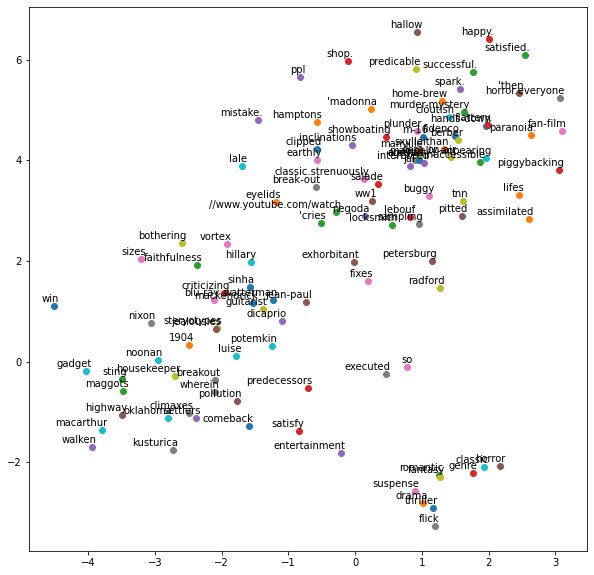

In [85]:
tsne_plot(model)

In [72]:
print("Cosine similarity between 'comedy' " +
               "and 'movies' - CBOW : ",
    model.wv.similarity('comedy', 'movies'))

print("Cosine similarity between 'comedy' " +
          "and 'movies' - Skip Gram : ",
    model_sg.wv.similarity('comedy', 'movies'))

Cosine similarity between 'comedy' and 'movies' - CBOW :  0.48381442
Cosine similarity between 'comedy' and 'movies' - Skip Gram :  0.5306902
